In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# About the Dataset

**Instagram generates a lot of data every day. When content creators post on Instagram, they do look at their engagement and reach to find the category of posts they should post more.**



*   The goal is:
  * Predict the reach of an Instagram post












**Exploring the Dataset**

In [2]:
!unzip 'archive.zip'
data = pd.read_csv("Instagram data.csv", encoding = 'latin1')

data.head()

Archive:  archive.zip
  inflating: Instagram data.csv      


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [3]:
print(data.shape)
data.info()

(119, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [4]:
data.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


In [5]:
duplicated = data.duplicated().sum()
null = data.isnull().sum()

print(f'- There are {duplicated} duplicated values')
print(f'- Null values: \n{null}')

- There are 17 duplicated values
- Null values: 
Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64


In [6]:
# Drop rows with duplicated values
data.drop_duplicates(inplace = True)

In [7]:
numerical_cols = ['From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows']
categorical_cols = ['Caption', 'Hashtags']

**Visualize Data**

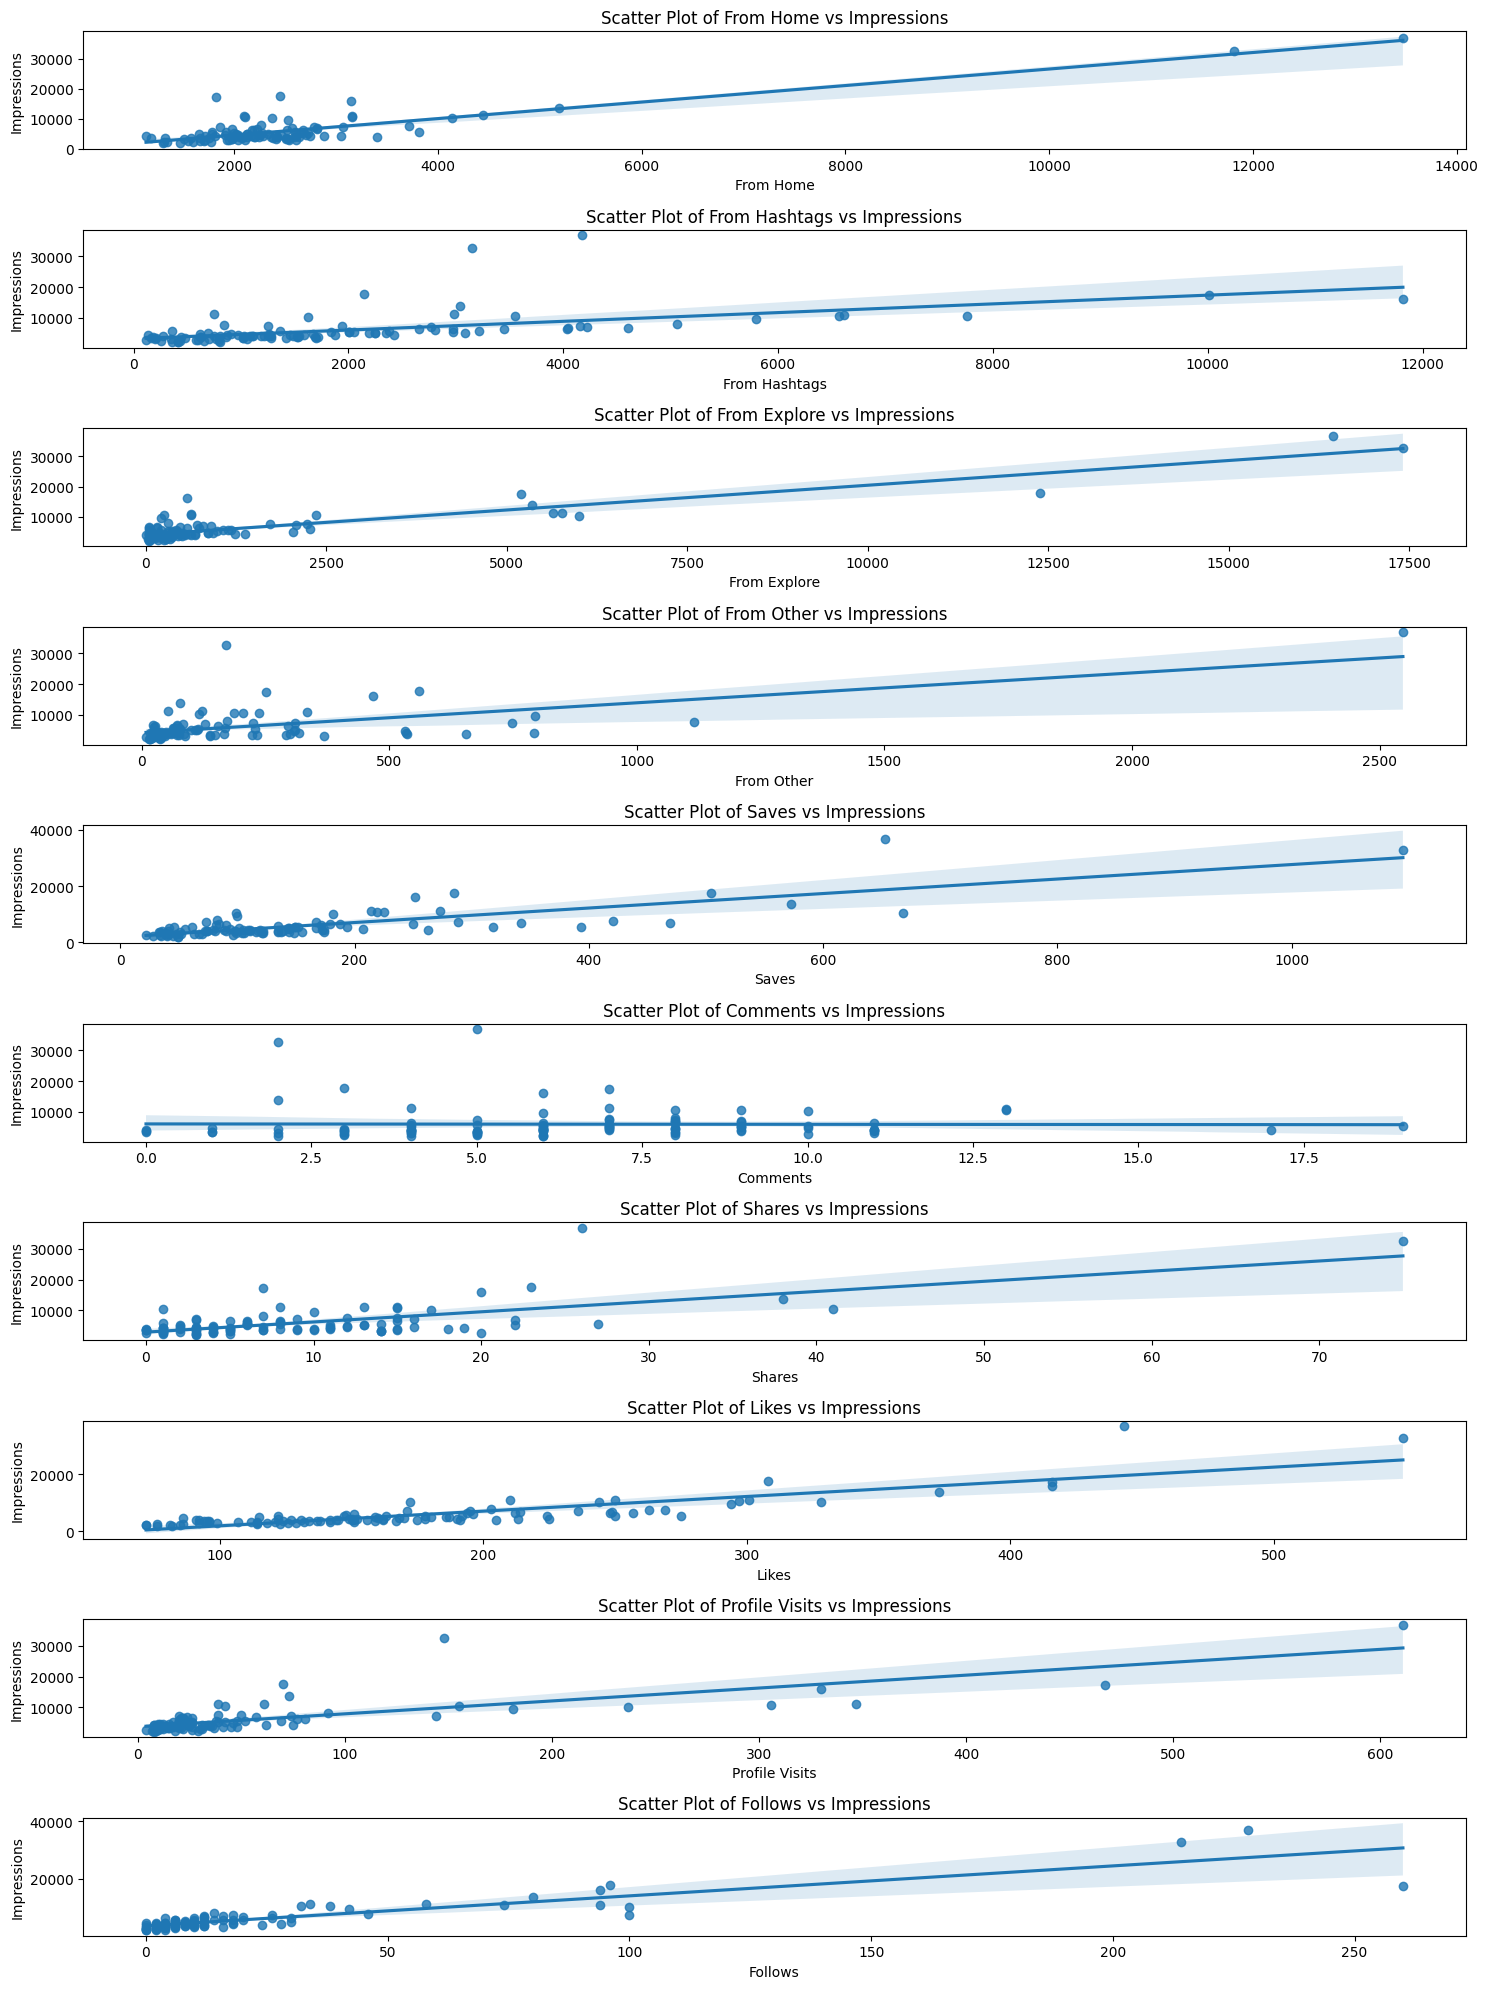

In [8]:
fig, axes = plt.subplots(nrows = len(numerical_cols), ncols = 1, figsize = (15, 2*len(numerical_cols)))
for i, feature in enumerate(numerical_cols):
  # Plot data
  sns.regplot(x = feature, y = 'Impressions', data = data, ax = axes[i])

  axes[i].set_title(f'Scatter Plot of {feature} vs Impressions')
  axes[i].set_xlabel(feature)
  axes[i].set_ylabel('Impressions')
# Adjust layoyt
plt.tight_layout()
plt.show()

In [9]:
data.corr()

<ipython-input-9-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
Impressions,1.000000,0.850210,0.547337,0.895021,0.586628,0.791448,-0.008535,0.654920,0.852952,0.762679,0.889944
From Home,0.850210,1.000000,0.171849,0.805609,0.560149,0.786382,0.002763,0.693729,0.697192,0.537245,0.676961
From Hashtags,0.547337,0.171849,1.000000,0.177493,0.210705,0.285209,0.213391,0.211964,0.667107,0.692433,0.549309
From Explore,0.895021,0.805609,0.177493,1.000000,0.490258,0.769341,-0.152720,0.643606,0.655724,0.530046,0.795342
From Other,0.586628,0.560149,0.210705,0.490258,1.000000,0.335213,-0.081073,0.155730,0.388314,0.627791,0.537115
Saves,0.791448,0.786382,0.285209,0.769341,0.335213,1.000000,-0.003695,0.874004,0.843395,0.377424,0.647585
Comments,-0.008535,0.002763,0.213391,-0.152720,-0.081073,-0.003695,1.000000,0.012697,0.163383,0.136590,-0.029298
Shares,0.654920,0.693729,0.211964,0.643606,0.155730,0.874004,0.012697,1.000000,0.718790,0.265460,0.517278
Likes,0.852952,0.697192,0.667107,0.655724,0.388314,0.843395,0.163383,0.718790,1.000000,0.642658,0.758234
Profile Visits,0.762679,0.537245,0.692433,0.530046,0.627791,0.377424,0.136590,0.265460,0.642658,1.000000,0.852748


We can observe from the graphs that except 'Comments' is quite consistency, the rest features contribute to the 'Impressions'

In [10]:
# Drop 'Comments' from training features
numerical_cols.remove('Comments')

X = data[numerical_cols]
y = data['Impressions']

**Scaling Features**

In [11]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [12]:
X_norm[:5]

array([[ 0.05636455, -0.47788834, -0.20103296, -0.41794074, -0.37293547,
        -0.42611941, -0.17494336, -0.21212618, -0.47901796],
       [ 0.14557276, -0.06621546, -0.00164134, -0.34641397,  0.23854881,
         0.46494578,  0.55676418, -0.07190718, -0.29498846],
       [-0.26060929, -0.39657024, -0.42341749,  1.13288971, -0.73600425,
        -0.82214839, -0.54079712,  0.0790979 , -0.24898109],
       [ 0.12849034, -0.68474126, -0.08858328, -0.36267006,  0.09841699,
        -0.22810493,  0.4269451 , -0.34155911, -0.34099584],
       [-0.50166126, -0.87075641, -0.32318279, -0.47971386, -0.38567472,
        -0.52512666, -0.635211  , -0.50335026, -0.52502534]])

**Building The Model (LinearRegression)**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

**Predict and Visualize Model**

In [15]:
y_pred = lr_model.predict(X_test)

pred_df = pd.DataFrame(y_pred, columns=['Predicted Impressions'])

In [16]:
actual_price = pd.DataFrame(y_test)
actual_price.rename(columns={'price': 'Actual Impressions'}, inplace=True)
actual_price.reset_index(drop=True, inplace=True)

In [17]:
comparison_df = pd.concat([pred_df, actual_price], axis=1)
comparison_df

,Predicted Impressions,Impressions
0,6764.137362,6666
1,10757.371417,10933
2,4330.583569,4239
3,2893.967264,2826
4,4343.791792,4289
5,16063.428672,16062
6,17478.688806,17396
7,4304.430243,4298
8,2281.760021,2218
9,4385.587559,3920


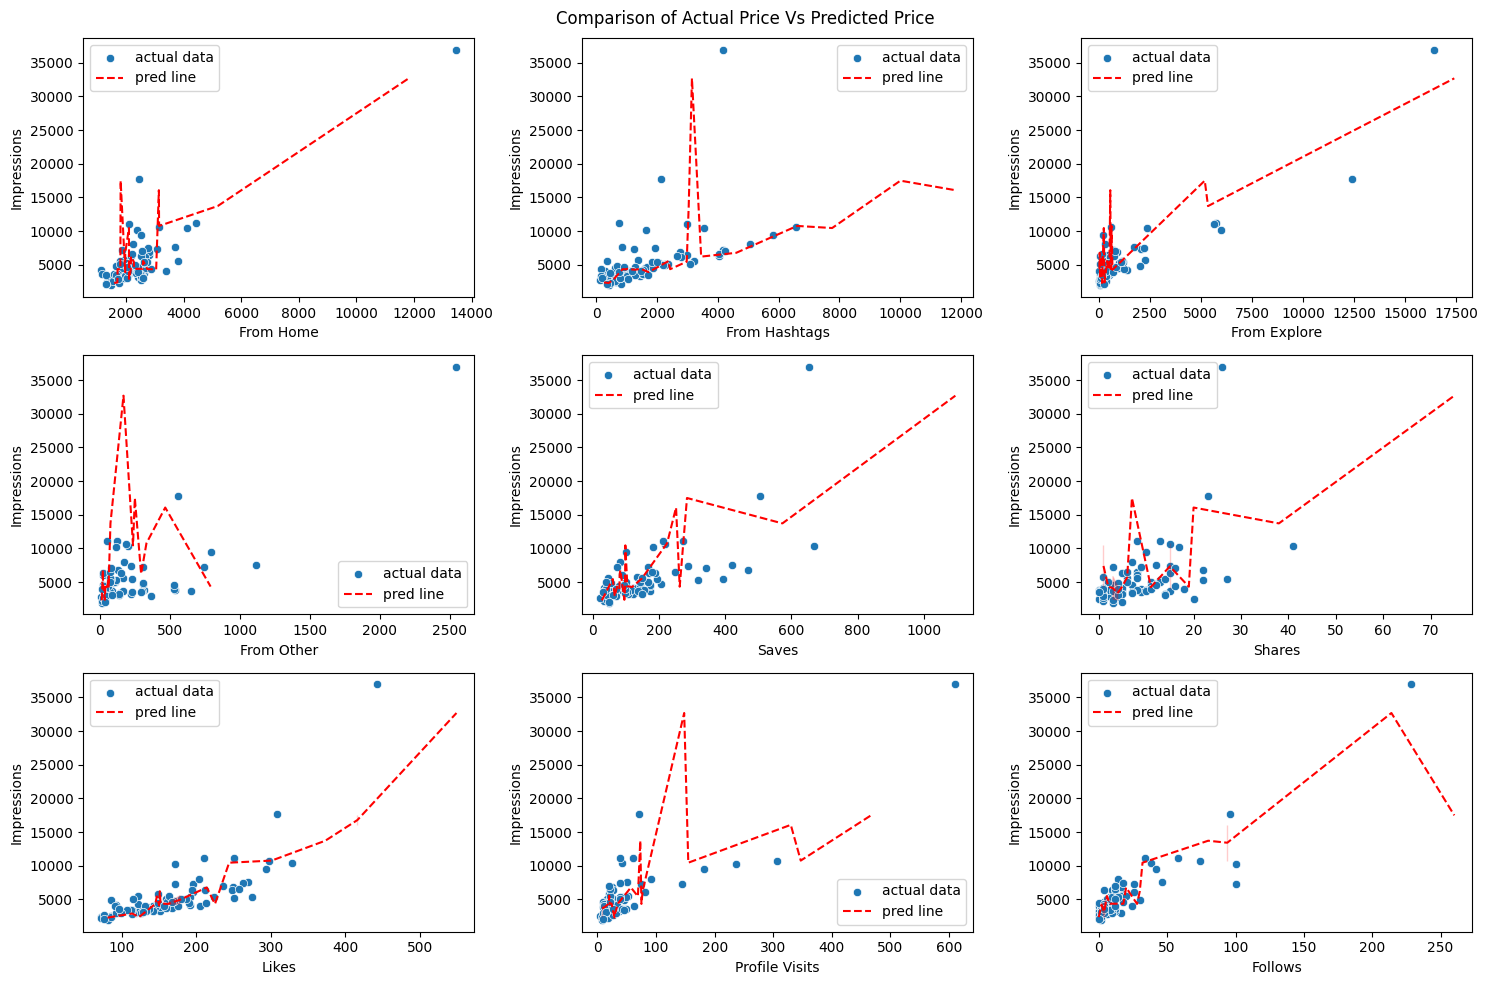

In [20]:
plt.figure(figsize=(15,10))

for i, column in enumerate(X_train.columns):
    plt.subplot(3,3,i+1)
    sns.scatterplot(x=X_train[column], y=y_train, label='actual data')
    sns.lineplot(x=X_test[column], y=y_pred, c='r', linestyle='--', label='pred line')

plt.suptitle("Comparison of Actual Price Vs Predicted Price")
plt.tight_layout()
plt.show()

In [21]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_score = r2_score(y_test, y_pred)


print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2_score}")

MAE: 84.65627284332133
MSE: 17019.990874008632
RMSE: 130.46068708238752
R2 Score: 0.9996548373543654


In [22]:
# Features = [['From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Shares', 'Likes', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 210.0, 15.0, 9.0, 165.0, 154.0, 10.0, 5.0 ]])
lr_model.predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([809.50762119])